EDA For CKD Data

In [4]:
pip install numpy pandas matplotlib seaborn

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.6 MB 4.8 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 5.7 MB/s eta 0:00:00
Note: you may need to rest

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('raw_data.csv')

In [7]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.isna().sum()

id                 0
age                0
bp                 0
sg                 0
al                 0
su                 0
rbc               60
pc                11
pcc                2
ba                 2
bgr               13
bu                 0
sc                 0
sod               36
pot               36
hemo               0
pcv                0
wc                 0
rc                17
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              249 non-null    int64  
 1   age             249 non-null    float64
 2   bp              249 non-null    float64
 3   sg              249 non-null    float64
 4   al              249 non-null    float64
 5   su              249 non-null    float64
 6   rbc             189 non-null    object 
 7   pc              238 non-null    object 
 8   pcc             247 non-null    object 
 9   ba              247 non-null    object 
 10  bgr             236 non-null    float64
 11  bu              249 non-null    float64
 12  sc              249 non-null    float64
 13  sod             213 non-null    float64
 14  pot             213 non-null    float64
 15  hemo            249 non-null    float64
 16  pcv             249 non-null    int64  
 17  wc              249 non-null    int

In [ ]:
df.nunique()

id                249
age                68
bp                  7
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               112
bu                 91
sc                 63
sod                30
pot                34
hemo              100
pcv                38
wc                 86
rc                 43
htn                 2
dm                  2
cad                 3
appet               2
pe                  2
ane                 2
classification      2
dtype: int64

In [11]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.00000,236.000000,249.000000,249.000000,213.000000,213.000000,249.000000,249.000000,249.000000,232.000000
mean,226.570281,51.124498,75.341365,1.018273,0.919679,0.39759,141.194915,54.688755,2.352209,138.511737,4.570423,13.066667,39.919679,8473.493976,4.747845
std,120.935150,16.482779,11.845100,0.005735,1.377225,1.05042,76.736882,49.213251,3.054361,7.139189,3.018218,2.843962,8.861477,3025.286617,0.991345
min,0.000000,5.000000,50.000000,1.005000,0.000000,0.00000,22.000000,1.500000,0.400000,111.000000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,124.000000,42.000000,70.000000,1.015000,0.000000,0.00000,96.750000,26.000000,0.800000,135.000000,3.800000,11.100000,34.000000,6600.000000,4.000000
50%,253.000000,54.000000,80.000000,1.020000,0.000000,0.00000,117.500000,40.000000,1.200000,139.000000,4.500000,13.600000,41.000000,8000.000000,4.800000
75%,333.000000,63.000000,80.000000,1.025000,2.000000,0.00000,140.000000,53.000000,2.300000,142.000000,4.900000,15.200000,46.000000,9800.000000,5.425000
max,399.000000,90.000000,110.000000,1.025000,5.000000,5.00000,490.000000,322.000000,18.100000,150.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [12]:
print(f"{df['rbc'].unique()} rbc Unique values")
print(f"{df['pc'].unique()} pc Unique values")
print(f"{df['pcc'].unique()} pcc Unique values")
print(f"{df['ba'].unique()} ba Unique values")
print(f"{df['htn'].unique()} htn Unique values")
print(f"{df['dm'].unique()} dm Unique values")
print(f"{df['cad'].unique()} cad Unique values")
print(f"{df['appet'].unique()} appet Unique values")
print(f"{df['pe'].unique()} pe Unique values")
print(f"{df['ane'].unique()} ane Unique values")


[nan 'normal' 'abnormal'] rbc Unique values
['normal' 'abnormal' nan] pc Unique values
['notpresent' 'present' nan] pcc Unique values
['notpresent' 'present' nan] ba Unique values
['yes' 'no' nan] htn Unique values
['yes' 'no' nan] dm Unique values
['no' 'yes' '\tno' nan] cad Unique values
['good' 'poor' nan] appet Unique values
['no' 'yes' nan] pe Unique values
['no' 'yes' nan] ane Unique values


In [13]:
unique_values = [feature for feature in df.columns if df[feature].nunique() < 5]
print(unique_values)

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [14]:
# Define Cateorical and Numerical Columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} Numerical Features {}".format(len(numeric_features), numeric_features))
print("We have {} Categorical Features {}".format(len(categorical_features), categorical_features))

We have 15 Numerical Features ['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
We have 11 Categorical Features ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [15]:
# Handling Missing Values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

In [ ]:
#Using Label Encoders and One Hot encoders to convert Categorical Features to Numerical Features



## Data Visualization (EDA)

#### For Numerical Features

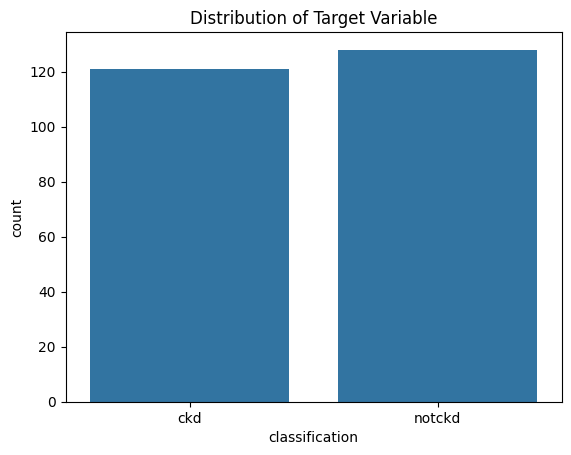

In [16]:
if 'classification' in df.columns:
    sns.countplot(x='classification', data=df)
    plt.title("Distribution of Target Variable")
    plt.show()

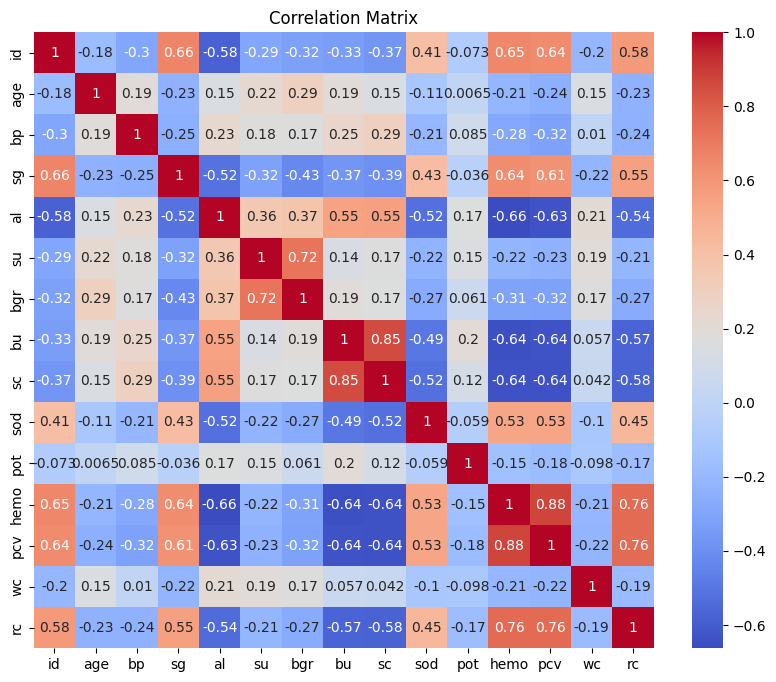

In [ ]:
# Calculate correlation matrix for all numerical features
corr_matrix = df.select_dtypes(include=np.number).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### Feature engineering

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
l = LabelEncoder()
df[categorical_features] = df[categorical_features].apply(lambda x: l.fit_transform(x))


In [19]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44,7800,5.2,1,1,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38,6000,4.8,0,0,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31,7500,4.8,0,1,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,1,0,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35,7300,4.6,0,0,1,0,0,0,0


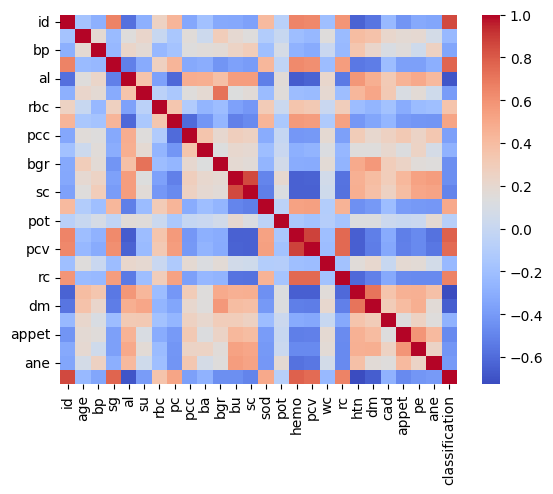

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

In [ ]:
features = ['age','bp','bgr','bu','hemo','htn']
target = ['classification']

## Model Training 

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
x_train = train_data[features]
y_train = train_data[target]

x_test = test_data[features]
y_test = test_data[target]

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((199, 6), (199, 1), (50, 6), (50, 1))

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),

    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier() 

}

# Iterate over models, train, predict, and evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.96      0.96      0.96        23

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

Decision Tree Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.96      0.96      0.96        23

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

Random Forest Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.96      1.00      0.98        23

    accuracy                           0.98        50
   macro avg       0.98      0.98  